In this Practical you will implement different architectures of neural networks for solving the sentiment analysis task. Last week you applied Multilayer Perceptron with average embedding vectors passed as input to perform the same task. This time you will used the Embedding layer available in Keras. Instead of a single (averaged) embedding vector, the model will take a sequence of embeddings as input. You will explore the following network architectures:
1. Multilayer Perceptron with the Embedding layer, which allows to learn an embedding for each word in the training set along with the neural network learning process.
2. Multilayer Perceptron with the Embedding layer and custom pre-trained word embeddings.
3. Convolutional Neural Network with the pre-trained word embeddings.

# Task 1: MLP with Embedding Layer

**T.1** Load the yelp reviews dataset. Split it into input/output and train/test sets.

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [6]:
df = pd.read_csv('yelp_reviews.csv',encoding = "ISO-8859-1")

#select input and output variables
data = df.values[:,0]
labels = df.values[:,1]

x_train, x_test, y_train, y_test = train_test_split(data, labels,test_size=0.3, random_state=0)

In [7]:
print(data)

['Crust is not good.' 'Not tasty and the texture was just nasty.'
 'Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.'
 'The selection on the menu was great and so were the prices.'
 'Now I am getting angry and I want my damn pho.'
 "Honeslty it didn't taste THAT fresh.)"
 'The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.'
 'The fries were great too.' 'A great touch.' 'Service was very prompt.'
 'Would not go back.'
 'The cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced.'
 'I tried the Cape Cod ravoli, chicken,with cranberry...mmmm!'
 'I was disgusted because I was pretty sure that was human hair.'
 'I was shocked because no signs indicate cash only.'
 'Highly recommended.' 'Waitress was a little slow in service.'
 'This place is not worth your time, let alone Vegas.'
 'did not like at all.' 'The Burrittos Blah!' 'The food, amazing.'
 'Servi

***
**T1.2** Data pre-processing.

The Embedding layer offered by Keras can be used for neural networks on text data. Embedding layer is initialized with random weights and will learn an embedding for all of the words in the training dataset. It requires the input data to be integer encoded, so that each word is represented by a unique integer. This data preparation step can be performed using the [Tokenizer API](http://faroit.com/keras-docs/1.2.2/preprocessing/text/) also provided with Keras. You can specify the vocabulary size via the $num\_words$ parameter. The tokenizer will pick the $num\_words$ of the most common words from your train dataset.

Convert each instance from the train set into sequence of integers using the Tokanizer.

In [8]:
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


Encoding each word into unique integer and converting each document into a sequence of integers.

In [9]:
tokenizer = Tokenizer(num_words=50000)
tokenizer.fit_on_texts(x_train)
sequences = tokenizer.texts_to_sequences(x_train)

You can test it by printing the first few elements from your train set and from the list storing the sequences of integer values. The number of words from the train set for each entry should be the same a the number of integers in the corresponding sequence.

In [10]:
for x in x_train[:5]:
    print(x)

I love this place.
The restaurant atmosphere was exquisite.
Google mediocre and I imagine Smashburger will pop up.
I seriously cannot believe that the owner has so many unexperienced employees that all are running around like chickens with their heads cut off.
This place is overpriced, not consistent with their boba, and it really is OVERPRICED!


In [11]:
sequences[:5]

[[3, 93, 8, 14],
 [1, 50, 145, 4, 696],
 [697, 229, 2, 3, 698, 699, 42, 700, 60],
 [3,
  230,
  440,
  336,
  28,
  1,
  441,
  82,
  21,
  168,
  701,
  702,
  28,
  43,
  32,
  337,
  197,
  37,
  703,
  18,
  44,
  704,
  442,
  231],
 [8, 14, 7, 169, 15, 705, 18, 44, 706, 2, 10, 46, 7, 169]]

The sequences have different lengths and Keras needs inputs to be vectorized and all inputs to have the same length. We have to pad all input sequences to have the same length. We can do this with a built in Keras function, in this case the $pad\_sequences()$ function.
Find the max length of a review and use the [pad_sequences function](https://keras.io/preprocessing/sequence/) to convert all sequences from the encoddings list into the same length.

In [12]:
length = []
for x in x_train:
    length.append(len(x.split()))
max(length)

32

Converting the sequences into padded sequences so they are all of the same length.  Keras zero-pads at the beginning, if a sentence length is shorter than the maximum length

In [13]:
from keras.preprocessing.sequence import pad_sequences
x_train_seq = pad_sequences(sequences, maxlen=40)
x_train_seq[:5]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  93,   8,
         14],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   1,  50, 145,   4,
        696],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 697, 229,   2,   3, 698, 699,  42, 700,
         60],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   3, 230, 440, 336,  28,   1, 441,  82,  21, 168,
        701, 702,  28,  43,  32, 337, 197,  37, 703,  18,  44, 704, 442,
        231],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 

***
**T1.3** Converting the test data into sequences of the same lenght.

Convert the test dataset into the same format. Use the Tokenizer specified ealier.

In [14]:
sequences_val = tokenizer.texts_to_sequences(x_test)
x_test_seq = pad_sequences(sequences_val, maxlen=40)

***
**T1.4 Train and evaluate MLP with Embedding layer**

Now you can train the MLP with the [Embedding layer](https://keras.io/layers/embeddings/) and evaluate it with the test data. The Embedding layer should added as the fist layer in a Sequential model followed by the Flatten layer. After this you can include some Dense layers suitable for your classification problem.

In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
import matplotlib.pyplot as plt

In [18]:
from numpy.random import seed
import tensorflow
seed(0)
tensorflow.random.set_seed(0)
model_1 = Sequential()
e = Embedding(50000, 300, input_length=40, trainable=True)
model_1.add(e)
model_1.add(Flatten())
model_1.add(Dense(10, activation='relu'))
model_1.add(Dense(1, activation='sigmoid'))
model_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model_1.fit(x_train_seq, y_train, validation_data=(x_test_seq, y_test), epochs=10, batch_size=32, verbose=2)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 697 samples, validate on 299 samples
Epoch 1/10
 - 5s - loss: 0.6968 - accuracy: 0.4892 - val_loss: 0.6931 - val_accuracy: 0.4983
Epoch 2/10


KeyboardInterrupt: 

# Task 3: Embedding Layer with pre-trained embeddings

The Keras embedding layer can also use a word embedding learned elsewhere such as word2vec or GloVe. The key difference is that the embedding layer can be seeded with the pre-trained word embedding weights. For this purpose you need to build a matrix of words using the word2vec/GloVe vectors. You can set number of words that we want to use. The words will be selected as the most frequent words in the training set.

The matrix should have the number of row equals to the number of words, and number of column equals to the dimension of the embedding vectors. In each row $i$ the matrix should contain the embedding for a word which is encoded with the $i$ number.

**T2.1** Load the word2vec and the GloVe models.

In [27]:
from gensim.models import KeyedVectors
import re 
from gensim.scripts.glove2word2vec import glove2word2vec

In [28]:
file = 'D:\PycharmProjects\RecordLinkage\Embedings Files\GoogleNews-vectors-negative300.bin'
#file = '/Users/annajurek/Documents/Queens/word embedding/GoogleNews-vectors-negative300.bin'
word2vec = KeyedVectors.load_word2vec_format(file, binary=True, limit=50000)
word2vec_vectors = word2vec.wv

C:\Users\3049848\AppData\Local\Anaconda\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  after removing the cwd from sys.path.


In [18]:
filename = 'D:\PycharmProjects\RecordLinkage\Embedings Files\Glove files\glove.6B.300d_1.txt'
glove = KeyedVectors.load_word2vec_format(filename, binary=False)
glove_vectors = glove.wv

C:\Users\3049848\AppData\Local\Anaconda\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  This is separate from the ipykernel package so we can avoid doing imports until


***
**T2.2** Constructing the weight matrix for the embedding layer

The matrix can be constructed as follow.

In [29]:
import numpy as np

num_words = len(tokenizer.word_index)+1
embedding_matrix = np.zeros((num_words, 300))
for word, i in tokenizer.word_index.items():
    if word in word2vec_vectors:
        embedding_vector = word2vec[word]
        embedding_matrix[i] = embedding_vector

In [30]:
embedding_matrix.shape

(1689, 300)

You can test whether the matrix has been constructed correctly via comparing its rows with the actual embeddings.

In [31]:
tokenizer.word_index.items()

dict_items([('the', 1), ('and', 2), ('i', 3), ('was', 4), ('a', 5), ('to', 6), ('is', 7), ('this', 8), ('of', 9), ('it', 10), ('in', 11), ('food', 12), ('for', 13), ('place', 14), ('not', 15), ('service', 16), ('good', 17), ('with', 18), ('very', 19), ('we', 20), ('so', 21), ('my', 22), ('be', 23), ('were', 24), ('have', 25), ('had', 26), ('great', 27), ('that', 28), ('but', 29), ('you', 30), ('they', 31), ('are', 32), ('here', 33), ('back', 34), ('on', 35), ('at', 36), ('like', 37), ('our', 38), ('go', 39), ('there', 40), ('as', 41), ('will', 42), ('all', 43), ('their', 44), ('time', 45), ('really', 46), ('best', 47), ('just', 48), ('never', 49), ('restaurant', 50), ('nice', 51), ('one', 52), ('also', 53), ('been', 54), ('an', 55), ('ever', 56), ('your', 57), ('if', 58), ('friendly', 59), ('up', 60), ("don't", 61), ('would', 62), ('only', 63), ('no', 64), ('disappointed', 65), ('delicious', 66), ('from', 67), ('bad', 68), ('amazing', 69), ('get', 70), ('again', 71), ('out', 72), ('som

In [32]:
print(np.array_equal(embedding_matrix[1] ,word2vec['the']))

True


***
**T2.3** Implementing MLP

Now you can implement the MLP. You will have to pass the embedding_matrix as the $weights$ attribute. Finally, we do not want to update the learned word weights in this model, therefore we will set the $trainable$ attribute for the model to be False.

In [19]:
Embedding(num_words, 300, weights=[embedding_matrix], input_length=40, trainable=False)

Update the model and evaluate it with the test data for comparison.

Train on 697 samples, validate on 299 samples
Epoch 1/10
 - 1s - loss: 0.6666 - acc: 0.6026 - val_loss: 0.6486 - val_acc: 0.6488
Epoch 2/10
 - 0s - loss: 0.5105 - acc: 0.8278 - val_loss: 0.6070 - val_acc: 0.6890
Epoch 3/10
 - 0s - loss: 0.3824 - acc: 0.9053 - val_loss: 0.5784 - val_acc: 0.7057
Epoch 4/10
 - 0s - loss: 0.2968 - acc: 0.9354 - val_loss: 0.5664 - val_acc: 0.7258
Epoch 5/10
 - 0s - loss: 0.2373 - acc: 0.9584 - val_loss: 0.5578 - val_acc: 0.7224
Epoch 6/10
 - 0s - loss: 0.1956 - acc: 0.9641 - val_loss: 0.5521 - val_acc: 0.7425
Epoch 7/10
 - 0s - loss: 0.1665 - acc: 0.9713 - val_loss: 0.5524 - val_acc: 0.7425
Epoch 8/10
 - 0s - loss: 0.1401 - acc: 0.9785 - val_loss: 0.5577 - val_acc: 0.7291
Epoch 9/10
 - 0s - loss: 0.1228 - acc: 0.9828 - val_loss: 0.5525 - val_acc: 0.7458
Epoch 10/10
 - 0s - loss: 0.1035 - acc: 0.9842 - val_loss: 0.5588 - val_acc: 0.7492


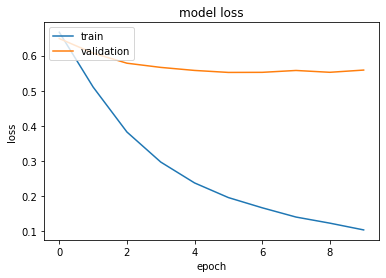

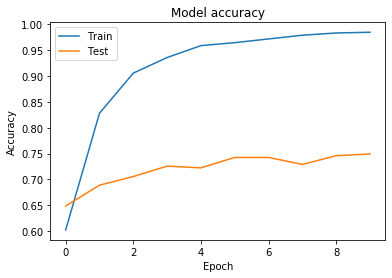

In [33]:
model_2 = Sequential()
e = Embedding(num_words, 300, weights=[embedding_matrix], input_length=40, trainable=False)
model_2.add(e)
model_2.add(Flatten())
model_2.add(Dense(10, activation='relu'))
model_2.add(Dense(1, activation='sigmoid'))
model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model_2.fit(x_train_seq, y_train, validation_data=(x_test_seq, y_test), epochs=10, batch_size=32, verbose=2)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [65]:
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 40, 300)           15000000  
_________________________________________________________________
flatten_9 (Flatten)          (None, 12000)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                120010    
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 11        
Total params: 15,120,021
Trainable params: 15,120,021
Non-trainable params: 0
_________________________________________________________________


***
**T2.4** Change the $trainable$ attribute to True and see if there is any difference in the performance.

In [34]:
model_3 = Sequential()
e = Embedding(num_words, 300, weights=[embedding_matrix], input_length=40, trainable=True)
model_3.add(e)
model_3.add(Flatten())
model_3.add(Dense(10, activation='relu'))
model_3.add(Dense(1, activation='sigmoid'))
model_3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_3.fit(x_train_seq, y_train, validation_data=(x_test_seq, y_test), epochs=10, batch_size=32, verbose=2)

Train on 697 samples, validate on 299 samples
Epoch 1/10
 - 1s - loss: 0.6667 - acc: 0.5940 - val_loss: 0.6472 - val_acc: 0.5886
Epoch 2/10
 - 0s - loss: 0.4684 - acc: 0.8694 - val_loss: 0.5812 - val_acc: 0.7191
Epoch 3/10
 - 0s - loss: 0.2913 - acc: 0.9498 - val_loss: 0.5329 - val_acc: 0.7291
Epoch 4/10
 - 0s - loss: 0.1684 - acc: 0.9770 - val_loss: 0.4992 - val_acc: 0.7492
Epoch 5/10
 - 0s - loss: 0.0964 - acc: 0.9885 - val_loss: 0.4886 - val_acc: 0.7659
Epoch 6/10
 - 0s - loss: 0.0566 - acc: 0.9971 - val_loss: 0.4771 - val_acc: 0.7793
Epoch 7/10
 - 0s - loss: 0.0358 - acc: 0.9986 - val_loss: 0.4942 - val_acc: 0.7759
Epoch 8/10
 - 0s - loss: 0.0248 - acc: 1.0000 - val_loss: 0.4875 - val_acc: 0.7826
Epoch 9/10
 - 0s - loss: 0.0174 - acc: 1.0000 - val_loss: 0.4924 - val_acc: 0.7726
Epoch 10/10
 - 0s - loss: 0.0126 - acc: 1.0000 - val_loss: 0.5002 - val_acc: 0.7826


# Task 3: Convolutional  Neural Network

**T3.1** Build a CNN using the embeding layer as previously. You can add filters using [Conv1D](https://keras.io/layers/convolutional/) layers and perform pooling via [max-pooling layer](https://keras.io/layers/pooling/). At the end you should add some Dense layers suitable for the classification task. Try using fixed pre-trained weights and trainable embeddings for comparison.

In [35]:
from keras.layers import Conv1D, GlobalMaxPooling1D

Using static word vectors extracted from Word2Vec

In [36]:
cnn_1 = Sequential()
e = Embedding(num_words, 300, weights=[embedding_matrix], input_length=40, trainable=False)
cnn_1.add(e)
cnn_1.add(Conv1D(128, 5, activation='relu'))
cnn_1.add(GlobalMaxPooling1D())
cnn_1.add(Dense(10, activation='relu'))
cnn_1.add(Dense(1, activation='sigmoid'))
cnn_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn_1.fit(x_train_seq, y_train, validation_data=(x_test_seq, y_test), epochs=10, batch_size=32, verbose=2)

Train on 697 samples, validate on 299 samples
Epoch 1/10
 - 1s - loss: 0.6326 - acc: 0.6385 - val_loss: 0.5841 - val_acc: 0.6823
Epoch 2/10
 - 1s - loss: 0.4005 - acc: 0.8895 - val_loss: 0.4840 - val_acc: 0.7492
Epoch 3/10
 - 1s - loss: 0.2456 - acc: 0.9469 - val_loss: 0.4273 - val_acc: 0.7960
Epoch 4/10
 - 1s - loss: 0.1478 - acc: 0.9842 - val_loss: 0.4291 - val_acc: 0.7826
Epoch 5/10
 - 1s - loss: 0.0850 - acc: 0.9957 - val_loss: 0.4059 - val_acc: 0.8094
Epoch 6/10
 - 1s - loss: 0.0518 - acc: 0.9957 - val_loss: 0.4001 - val_acc: 0.8094
Epoch 7/10
 - 1s - loss: 0.0337 - acc: 0.9971 - val_loss: 0.4144 - val_acc: 0.8094
Epoch 8/10
 - 1s - loss: 0.0226 - acc: 0.9986 - val_loss: 0.4586 - val_acc: 0.7926
Epoch 9/10
 - 1s - loss: 0.0164 - acc: 1.0000 - val_loss: 0.4431 - val_acc: 0.8027
Epoch 10/10
 - 1s - loss: 0.0119 - acc: 1.0000 - val_loss: 0.4268 - val_acc: 0.8094


Trainable word2vec ebmeddings.

In [38]:
cnn_2 = Sequential()
e = Embedding(num_words, 300, weights=[embedding_matrix], input_length=40, trainable=True)
cnn_2.add(e)
cnn_2.add(Conv1D(128, 5, activation='relu'))
cnn_2.add(GlobalMaxPooling1D())
cnn_2.add(Dense(10, activation='relu'))
cnn_2.add(Dense(1, activation='sigmoid'))
cnn_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn_2.fit(x_train_seq, y_train, validation_data=(x_test_seq, y_test), epochs=10, batch_size=32, verbose=2)

Train on 697 samples, validate on 299 samples
Epoch 1/10
 - 2s - loss: 0.6352 - acc: 0.6370 - val_loss: 0.5747 - val_acc: 0.6823
Epoch 2/10
 - 1s - loss: 0.3355 - acc: 0.9125 - val_loss: 0.4478 - val_acc: 0.7960
Epoch 3/10
 - 1s - loss: 0.1626 - acc: 0.9756 - val_loss: 0.4093 - val_acc: 0.8328
Epoch 4/10
 - 1s - loss: 0.0753 - acc: 0.9914 - val_loss: 0.3720 - val_acc: 0.8462
Epoch 5/10
 - 1s - loss: 0.0342 - acc: 0.9971 - val_loss: 0.3824 - val_acc: 0.8361
Epoch 6/10
 - 1s - loss: 0.0176 - acc: 0.9986 - val_loss: 0.3825 - val_acc: 0.8428
Epoch 7/10
 - 1s - loss: 0.0106 - acc: 1.0000 - val_loss: 0.3890 - val_acc: 0.8395
Epoch 8/10
 - 1s - loss: 0.0070 - acc: 1.0000 - val_loss: 0.4008 - val_acc: 0.8562
Epoch 9/10
 - 1s - loss: 0.0053 - acc: 1.0000 - val_loss: 0.4016 - val_acc: 0.8528
Epoch 10/10
 - 1s - loss: 0.0040 - acc: 1.0000 - val_loss: 0.4079 - val_acc: 0.8595


Training custom embeddings with Keras Embedding layer

In [41]:
cnn_3 = Sequential()
e = Embedding(num_words, 300, input_length=40, trainable=True)
cnn_3.add(e)
cnn_3.add(Conv1D(filters=100, kernel_size=2, padding='valid', activation='relu', strides=1))
cnn_3.add(GlobalMaxPooling1D())
cnn_3.add(Dense(256, activation='relu'))
cnn_3.add(Dense(1, activation='sigmoid'))
cnn_3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn_3.fit(x_train_seq, y_train, validation_data=(x_test_seq, y_test), epochs=10, batch_size=32, verbose=2)

Train on 697 samples, validate on 299 samples
Epoch 1/10
 - 1s - loss: 0.6874 - acc: 0.5423 - val_loss: 0.6689 - val_acc: 0.6689
Epoch 2/10
 - 1s - loss: 0.5765 - acc: 0.8221 - val_loss: 0.5434 - val_acc: 0.7625
Epoch 3/10
 - 0s - loss: 0.2515 - acc: 0.9584 - val_loss: 0.4190 - val_acc: 0.8094
Epoch 4/10
 - 0s - loss: 0.0524 - acc: 0.9914 - val_loss: 0.4269 - val_acc: 0.7960
Epoch 5/10
 - 0s - loss: 0.0081 - acc: 1.0000 - val_loss: 0.4583 - val_acc: 0.8027
Epoch 6/10
 - 1s - loss: 0.0029 - acc: 1.0000 - val_loss: 0.4837 - val_acc: 0.7960
Epoch 7/10
 - 0s - loss: 0.0016 - acc: 1.0000 - val_loss: 0.4943 - val_acc: 0.7960
Epoch 8/10
 - 0s - loss: 0.0010 - acc: 1.0000 - val_loss: 0.5100 - val_acc: 0.7926
Epoch 9/10
 - 0s - loss: 7.6924e-04 - acc: 1.0000 - val_loss: 0.5163 - val_acc: 0.7993
Epoch 10/10
 - 0s - loss: 5.8448e-04 - acc: 1.0000 - val_loss: 0.5280 - val_acc: 0.7993
